## Load MNIST on Python 3.x

In [13]:
import pickle
import gzip
import numpy as np
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard

Using TensorFlow backend.


In [6]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, testing_data = pickle.load(f, encoding='latin1')

train_data=np.array(training_data[0])
train_target=np.array(training_data[1])
valid_data=np.array(validation_data[0])
valid_target=np.array(validation_data[1])
test_data=np.array(testing_data[0])
test_target=np.array(testing_data[1])

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

print(train_target.shape)
print(valid_target.shape)
print(test_target.shape)
f.close()

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


## Load USPS on Python 3.x

In [7]:
from PIL import Image
import os


In [8]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
print(np.array(USPSMat).shape)
print(np.array(USPSTar).shape)
USPS_data=np.array(USPSMat)
USPS_Target=np.array(USPSTar)

(19999, 784)
(19999,)


In [59]:
def genMNISTModel(RawData):
    input_size = RawData.shape[1]
    drop_out = 0.2
    first_dense_layer_nodes  = 128 
    second_dense_layer_nodes = 64
    
    third_dense_layer_nodes = 10


    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))



    model.add(Dense(second_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))

    model.add(Dropout(drop_out))

    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model



In [60]:
MNISTmodel=genMNISTModel(train_data)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
__________

In [61]:
from keras.utils import np_utils
def runMNISTModel(train_data,train_target,model):
    
    validation_data_split = 0.2 # This is the validation data split ratio from the training set .This means last 20% of
# data will be used as the validation set.
    num_epochs = 50 # epochs are the number of datasets given to the model to learn.Changing to 1000 for 3 dense layers
# as accuracy is reaching 0.99 in the first 200 epochs only   
    model_batch_size = 100 # No of training examples used per iteration
    tb_batch_size = 32 # batch_size used in callback functions to get the statistics of the model that is getting trained
    early_patience = 25 # no of epochs with no improvement after which training is stopped

# EarlyStopping is used to stop the training when a monitored value stops improving.
    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

    TrainingData = train_data
    TrainingTarget = train_target
    TargetVector = np_utils.to_categorical(TrainingTarget,10)
    #print(TrainingData)
    history = model.fit(TrainingData
                    , TargetVector
                    , validation_data=(valid_data,np_utils.to_categorical(valid_target,10))
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )
    return history

In [62]:
history=runMNISTModel(train_data,train_target,MNISTmodel)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 474us/step - loss: 0.4552 - acc: 0.8618 - val_loss: 0.1655 - val_acc: 0.9514
Epoch 2/50
50000/50000 [==============================] - 22s 443us/step - loss: 0.2064 - acc: 0.9392 - val_loss: 0.1169 - val_acc: 0.9664
Epoch 3/50
50000/50000 [==============================] - 22s 438us/step - loss: 0.1552 - acc: 0.9532 - val_loss: 0.1072 - val_acc: 0.9687
Epoch 4/50
50000/50000 [==============================] - 21s 426us/step - loss: 0.1296 - acc: 0.9612 - val_loss: 0.0922 - val_acc: 0.9736
Epoch 5/50
50000/50000 [==============================] - 26s 512us/step - loss: 0.1109 - acc: 0.9668 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 6/50
50000/50000 [==============================] - 22s 443us/step - loss: 0.0973 - acc: 0.9700 - val_loss: 0.0831 - val_acc: 0.9762
Epoch 7/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.0871 - acc: 0.9727 - val_loss: 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a5d378240>,
      dtype=object)

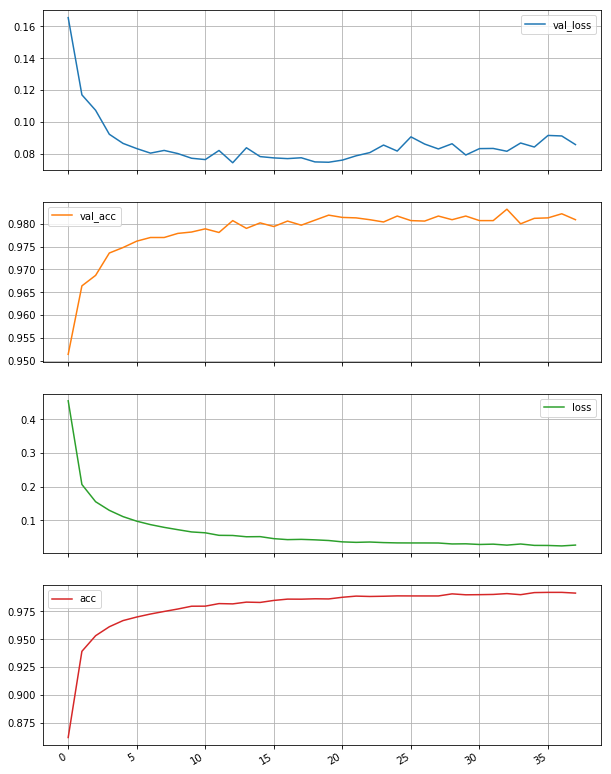

In [63]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [65]:
from sklearn.metrics import confusion_matrix
right   = 0
uright = 0 
mnistPredictions = MNISTmodel.predict(test_data)
mnist_target = np_utils.to_categorical(test_target, 10)

uspsPrediction = MNISTmodel.predict(USPS_data)
usps_target = np_utils.to_categorical(USPS_Target, 10)

for i in range(0,len(mnistPredictions)):
    if(mnist_target[i].argmax()==mnistPredictions[i].argmax()):
        right=right+1

for i in range(0,len(uspsPrediction)):
    if(usps_target[i].argmax()==uspsPrediction[i].argmax()):
        uright=uright+1        
        
print ('----------Keras Neural Network MNIST Data Prediction --------------------')
print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')        
print("MNIST Testing Accuracy =" +str(right/len(mnistPredictions)*100)   ) 
print("USPS Testing Accuracy =" +str(uright/len(uspsPrediction)*100)   ) 

print ('---------- MNIST Testing Confusion Matrix--------------------')
print(confusion_matrix(test_target, np.argmax(mnistPredictions,axis=1)))

print ('---------- USPS Testing Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, np.argmax(uspsPrediction,axis=1)))

----------Keras Neural Network MNIST Data Prediction --------------------
UBITname      = APURBAMA
Person Number = 50288705
MNIST Testing Accuracy =97.88
USPS Testing Accuracy =46.83234161708085
---------- MNIST Testing Confusion Matrix--------------------
[[ 972    0    1    1    1    1    1    1    1    1]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   4    2 1002    6    1    0    1    7    9    0]
 [   0    0    1  987    0    5    0    4    5    8]
 [   2    1    4    1  964    0    3    2    0    5]
 [   2    0    0    9    2  865    5    0    7    2]
 [   4    4    0    1    2    3  944    0    0    0]
 [   0    8    9    2    0    0    0 1002    2    5]
 [   4    0    2    5    3    4    0    4  950    2]
 [   1    4    0    5   14    2    1    5    3  974]]
---------- USPS Testing Confusion Matrix--------------------
[[ 490    4  130  150   90  301  264  289   58  224]
 [  25  549  367  102  384  113   21  311   95   33]
 [  35   21 1531   82   25  102   76   54   6